In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

import torchvision
import torchvision.transforms as transforms

### Loading Data

In [2]:
trainset = torchvision.datasets.CIFAR10(root= './data', train= True, download= True, transform= transforms.ToTensor())

Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle= True)

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
4


### Visualise data

In [6]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


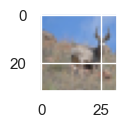

In [9]:
plt.figure(figsize= (1, 1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

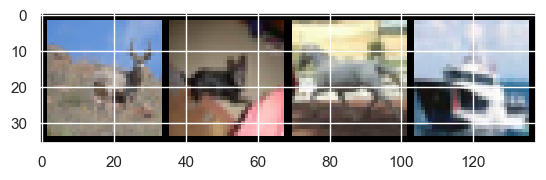

deer dog horse ship


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

### CNN

In [12]:
import torch.nn as nn

In [13]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 16, 5), # depth, filters, filtersize (16, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(2, stride= 2), # (16, 14, 14)
            nn.Conv2d(16, 32, 3), # (32 , 12, 12)
            nn.ReLU(),
            nn.MaxPool2d(2, stride= 2) # (32, 6, 6)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(1152, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )

    
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x


In [15]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root= './data', train= True, download= True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size =batch_size, shuffle= True)

testset = torchvision.datasets.CIFAR10(root= './data', train= False, download= True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size =batch_size, shuffle= False)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [17]:
net = CNN().to(device)

In [18]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [19]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())
    
    loss_epoch_arr.append(loss.item())
    print("Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f" % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))


plt.plot(loss_epoch_arr)
plt.show()